**Monte-Carlo and Temporal Difference**

In this exercise, we are going to compare two algorithms that work model-free to estimate the value function: every-visit Monte Carlo, and Temporal Difference. We will use the next MDP, which is a Random Walk:

![alt text](rw.png "Title")

Let us start with the imports. We use only numpy and matplotlib in this exercise.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

The next thing we do is to seed the random number generator.This is done to ensure that the results are reproducible.At this point, this is not strictly necessary, but it is good practice to do so (and when working with Deep Reinforcement Learning, it is absolutely necessary).

In [27]:
rng = np.random.default_rng(1234)

Now, let us define the parameters of the problem. We have an MDP with seven states (two of which are terminal states), and two actions. The rewards, discount factor, and transition probabilities are given in the figure above. For this case, we only evaluate one policy: the uniform random policy, which assigns equal probability to all actions in all states.

In [28]:
gamma = 0.9
R = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0]]).T
P = np.array([[1, 0, 0, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0],
              [0, 0, 1, 0, 0, 0, 0],
              [1, 0, 0, 0, 0, 0, 0],
              [0, 0, 0, 1, 0, 0, 0],
              [0, 1, 0, 0, 0, 0, 0],
              [0, 0, 0, 0, 1, 0, 0],
              [0, 0, 1, 0, 0, 0, 0],
              [0, 0, 0, 0, 0, 1, 0],
              [0, 0, 0, 1, 0, 0, 0],
              [0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 1, 0, 0],
              [0, 0, 0, 0, 0, 0, 1],
              [0, 0, 0, 0, 0, 0, 1]])
pi = np.array([[0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0.5, 0.5, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5, 0, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0.5, 0.5]])

v_pi_bellman = (np.linalg.inv(np.eye(pi.shape[0]) - gamma * pi @ P) @ pi @ R).flatten()  # Theoretical value function, used for checking the results later

Now, copy the MC implementation you did in the previous exercise here, in order to obtain a result similar to the one provided. Note that you have to store the value function for each iteration.

In [29]:
n_states = 7
n_actions = 2
n_s = np.zeros((n_states, 1))

threshold = 1e-5  # Variation change for convergence check in VI
i = 0  # VI iterations
delta = 1.0  # Initial difference value
v_mc = [np.zeros((n_states, 1))]  # Randomly initiate the value function
min_iters = 100  # Set a minimum set of MC iterations: as the reward is sparse, it may (wrongly) converge in the first iterations, if the first episode only has zero rewards

converged = False

while not converged:
    delta = 0
    next_state = 3  # Fixed initial state

    # To be filled by the student

    i += 1
    converged = (delta < threshold) and (i > min_iters)

print(f"Every-visit Monte-Carlo has converged after {i} iterations")

with np.printoptions(precision=2, suppress=True):
    print(f"v^pi theory = {v_pi_bellman.flatten()}")
    print(f"v^pi MC = {v_mc[-1].flatten()}")


Every-visit Monte-Carlo has converged after 8748 iterations
v^pi theory = [-0.    0.07  0.15  0.26  0.43  0.69  0.  ]
v^pi MC = [0.   0.06 0.15 0.26 0.44 0.71 0.  ]


Now, we are going to implement the TD algorithm, as it is in your slides. Note that you have to store the value function for each iteration.

In [30]:
n_states = 7
n_actions = 2
n_s = np.zeros((n_states, 1))

v_td = [np.zeros((n_states, 1))]  # Randomly initiate the value function
max_episodes = len(v_mc)  # Run TD for the same number of episodes as MC
alpha = 0.02 # Learning rate

for i in range(max_episodes):

    next_state = 3  # Fixed initial state

    # To be filled by the student

with np.printoptions(precision=2, suppress=True):
    print(f"v^pi theory = {v_pi_bellman.flatten()}")
    print(f"v^pi TD = {v_td[-1].flatten()}")


v^pi theory = [-0.    0.07  0.15  0.26  0.43  0.69  0.  ]
v^pi TD = [0.   0.07 0.15 0.26 0.47 0.67 0.  ]


Finally, let us show the error between the theoretical value function and the one obtained with MC and TD. Note that the error is computed as the mean squared error between the value function obtained with MC and TD, and the theoretical value function.

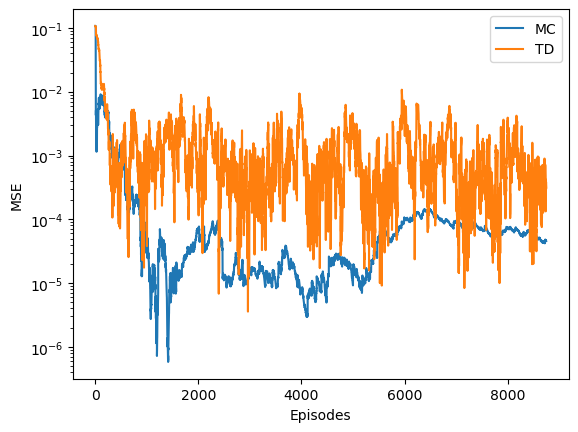

In [31]:
error_mc = [np.mean(np.square(v.flatten() - v_pi_bellman)) for v in v_mc]
error_td = [np.mean(np.square(v.flatten() - v_pi_bellman)) for v in v_td]

plt.semilogy(error_mc, label="MC")
plt.semilogy(error_td, label="TD")
plt.xlabel("Episodes")
plt.ylabel("MSE")
plt.legend(loc='best')
plt.show()